In [0]:
# Meta Data

## 📺 Introduction

# The Bright TV Viewership Dashboard project provides an in-depth analysis of television viewership patterns across different demographic and platform segments.
# It aims to transform raw viewing data into actionable insights using a structured data pipeline - from data ingestion and cleaning to SQL-based aggregation and interactive visualization in Google Looker Studio.

# The dataset captures information about what customers watch, how long they engage, and on which platforms, helping identify trends such as Platform preferences (e.g., Leanback, web, or iOS)

## Dataset Description

# The dataset contains detailed records of video viewership behavior, capturing how and when customers interact with content across different platforms.
# Each row represents a unique viewing event or session and includes the following key fields:

# - DateID: Identifies the specific date of the viewing activity, typically formatted as a date key (e.g., 20251011).
# - CustomerID: A unique identifier assigned to each customer, allowing analysis of viewing patterns across individuals.
# - TotalTimeWatched: Indicates the total duration of video content watched during a session, measured in minutes or seconds.
# - Platform: Specifies the device or service used to access the video, such as Mobile App, Web Browser, Smart TV, or Tablet.
# - PlayEventType: Describes the type of user interaction recorded - for example, Play, Pause, Stop, Seek, or Resume.
# - VideoTitle: The title or name of the video or program watched, used to analyze content popularity and audience preferences.

# This dataset serves as the foundation for analyzing viewership trends, engagement behavior, and platform performance across different audience segments.

## Data Purpose / Objective

# The primary purpose of this dataset is to analyze and understand viewer engagement and content consumption patterns across different audience segments and platforms.

# By examining metrics such as total watch time, play event types, and platform usage, the analysis aims to:

# - Identify which content or channels attract the most viewers.
# - Understand viewership behavior by age, gender, and region.
# - Measure audience engagement levels through total time watched.
# - Compare platform performance (e.g., mobile vs. TV vs. web).
# - Detect viewing trends over time, such as peak days, time slots, or day types.

## Bright TV Viewership Data Pipeline (Step-by-Step)
# 1. Data Ingestion
# 2. Data Cleaning & Preparation
# 3. Data Aggregation & Transformation
# 4. Data Inspection
# 5. Dashboard Visualization using Matplotlib
# 6. Insights & Outcomes
# 7. Version Control & Documentation
# 8. Exploratory Data Analysis (EDA)

# Install Dependencies

In [0]:
# Allows to open an Excel file and read data:
!pip install openpyxl

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


#Import Library
Library is a collection of pre-written code that you can use to perform common tasks without having to write the code from scratch.They are built-in and are used by importing them with the import statement.

In [0]:
# Pandas are for data analysis, manupulation and  working with tables/excel sheets (DataFrames).
import pandas as pd 

# Numpy is for numerical operations or math functions.
import numpy as np

# Matplotlib to create viewership visualizations, 
import matplotlib.pyplot as plt



**Data Import**

In [0]:
# location of data
data_path="/Workspace/Users/tkndlovu111@gmail.com/Class Projects/Viewer_ Analysis_ Ex.xlsx"

In [0]:
# read excel file
df = pd.read_excel(data_path)
display(df)

In [0]:
# Show last 5 rows.
df.tail(5)

,DateID,CustomerID,TotalTimeWatched,Platform,PlayEventType,VideoTitle
118529,20210416,DGXM5TJ18W1LANOLKJJN5MFT000G,600,Leanback,LiveTV,New Day
118530,20210416,DMMVDBZFDT1F7WL4BGWQ5KOJ000G,5194,Web,LiveTV,Buying And Selling With Property...
118531,20210416,1JKBIAY7MEUH6BWX0SCU93GJ000I,47660,Web,LiveTV,Expresso
118532,20210416,1ADX18R3B33REZ2T0NK911E4002W,1335,Leanback,LiveTV,Unknown
118533,20210416,BO0REPHA6FP7C15B0K9N1GVO0050,360,iOS,LiveTV,Imbewu


In [0]:
# Summary of DataFrame (columns, types, nulls).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118534 entries, 0 to 118533
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   DateID            118534 non-null  int64 
 1   CustomerID        118534 non-null  object
 2   TotalTimeWatched  118534 non-null  int64 
 3   Platform          118534 non-null  object
 4   PlayEventType     118534 non-null  object
 5   VideoTitle        118534 non-null  object
dtypes: int64(2), object(4)
memory usage: 5.4+ MB


In [0]:
# number of rows, columns
df.shape

(118534, 6)

In [0]:
# Data types of columns.
df.dtypes

DateID               int64
CustomerID          object
TotalTimeWatched     int64
Platform            object
PlayEventType       object
VideoTitle          object
dtype: object

In [0]:
# Select a column.
# df['column']
df["VideoTitle"]



0                   F1 '20: Emilia Romagna GP
1                   F1 '20: Emilia Romagna GP
2                             Chasing The Sun
3                             Chasing The Sun
4                          Sonic The Hedgehog
                         ...                 
118529                                New Day
118530    Buying And Selling With Property...
118531                               Expresso
118532                                Unknown
118533                                 Imbewu
Name: VideoTitle, Length: 118534, dtype: object

In [0]:
# Select multiple columns.
# df[["Col1", "Col2"]]
df[['Platform', 'PlayEventType']]

,Platform,PlayEventType
0,Leanback,LiveTV
1,Leanback,LiveTV
2,Leanback,Other
3,Leanback,Other
4,Leanback,LiveTV
...,...,...
118529,Leanback,LiveTV
118530,Web,LiveTV
118531,Web,LiveTV
118532,Leanback,LiveTV


In [0]:
# List of column names
df.columns

Index(['DateID', 'CustomerID', 'TotalTimeWatched', 'Platform', 'PlayEventType',
       'VideoTitle'],
      dtype='object')

In [0]:
# Get unique values in a column (Platform)
df['Platform'].unique()


array(['Leanback', 'iOS', 'Web', 'Android'], dtype=object)

In [0]:
# Get unique values in a column (PlayEventType)
df['PlayEventType'].unique()

array(['LiveTV', 'Other', 'Catch Up', 'Downloads'], dtype=object)

In [0]:
# Get unique values in a column (VideoTitle)
df['VideoTitle'].unique()

array(["F1 '20: Emilia Romagna GP", 'Chasing The Sun',
       'Sonic The Hedgehog', ..., 'Baby', 'Iron Man 3',
       'The Campaign Against The Climate'], dtype=object)

In [0]:
# Maximum value in the column (TotalTimeWatched)
df['TotalTimeWatched'].max()


88500

In [0]:
# Minimum value in the column (TotalTimeWatched)
df['TotalTimeWatched'].min()

1

In [0]:
# Check if any row is duplicated
df.duplicated().sum()

9873

In [0]:
# Remove duplicates from the whole DataFrame
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [0]:
# check missing values
df.isnull().sum()

DateID              0
CustomerID          0
TotalTimeWatched    0
Platform            0
PlayEventType       0
VideoTitle          0
dtype: int64

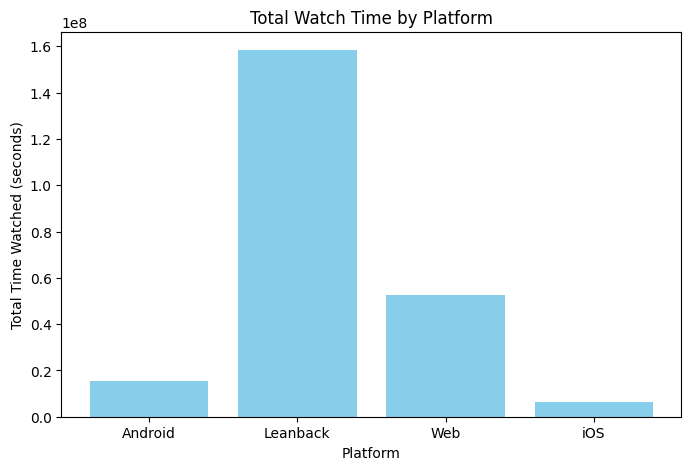

In [0]:
platform_watch = df.groupby('Platform')['TotalTimeWatched'].sum()

plt.figure(figsize=(8,5))
plt.bar(platform_watch.index, platform_watch.values, color='skyblue')
plt.title('Total Watch Time by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Time Watched (seconds)')
plt.show()

Insight:
Leanback has the highest total watch time, followed by Web, Android, and iOS, indicating that users engage most with Leanback, while iOS sees the least viewing activity.

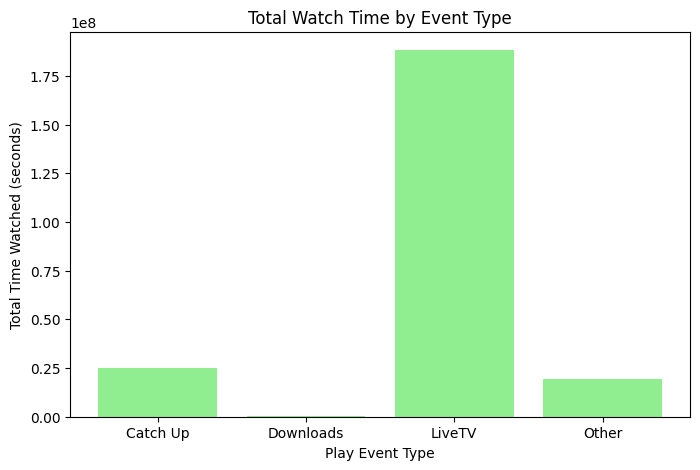

In [0]:
event_watch = df.groupby('PlayEventType')['TotalTimeWatched'].sum()

plt.figure(figsize=(8,5))
plt.bar(event_watch.index, event_watch.values, color='lightgreen')
plt.title('Total Watch Time by Event Type')
plt.xlabel('Play Event Type')
plt.ylabel('Total Time Watched (seconds)')
plt.show()

Live TV has the highest total watch time, followed by Catchup and Other, while Downloads show no watch time, indicating that users primarily engage with Live TV content.

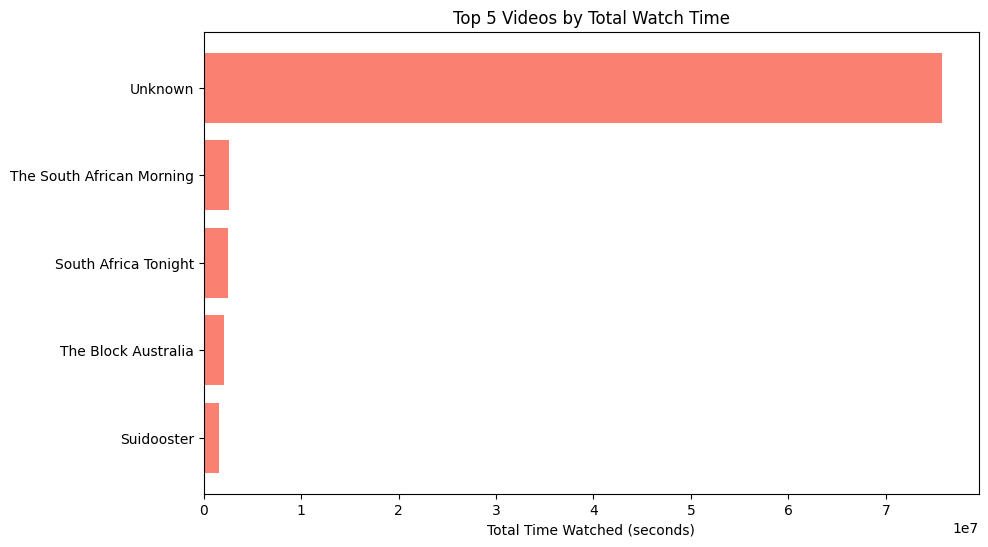

In [0]:
top_videos = df.groupby('VideoTitle')['TotalTimeWatched'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,6))
plt.barh(top_videos.index, top_videos.values, color='salmon')
plt.title('Top 5 Videos by Total Watch Time')
plt.xlabel('Total Time Watched (seconds)')
plt.gca().invert_yaxis()  # Largest on top
plt.show()

Unknown Leading’ has the highest total watch time, followed by ‘South African Morning’ and ‘South African Tonight’, while ‘The Block Australia’ and ‘Suidooster’ have the lowest watch time among the top 5 videos, highlighting the most and least popular content.”